<a href="https://colab.research.google.com/github/imad10902/Quantium-Virtual-Internship/blob/main/Quantium_Virtual_Internship_Retail_Strategy_and_Analytics_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [386]:
purchase_behaviour_df = pd.read_csv("QVI_purchase_behaviour.csv")

In [387]:
transaction_df = pd.read_excel("QVI_transaction_data.xlsx")

In [388]:
purchase_behaviour_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [389]:
purchase_behaviour_df.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

In [390]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [391]:
transaction_df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [392]:
def check_empty(df):
  for col in df.columns:
    if(df[col].isnull().any()):
      print(f"There are empty places in '{col}' column")
    else:
      print(f"There are no empty spaces in '{col}' column")

In [393]:
check_empty(purchase_behaviour_df)

There are no empty spaces in 'LYLTY_CARD_NBR' column
There are no empty spaces in 'LIFESTAGE' column
There are no empty spaces in 'PREMIUM_CUSTOMER' column


In [394]:
check_empty(transaction_df)

There are no empty spaces in 'DATE' column
There are no empty spaces in 'STORE_NBR' column
There are no empty spaces in 'LYLTY_CARD_NBR' column
There are no empty spaces in 'TXN_ID' column
There are no empty spaces in 'PROD_NBR' column
There are no empty spaces in 'PROD_NAME' column
There are no empty spaces in 'PROD_QTY' column
There are no empty spaces in 'TOT_SALES' column


In [395]:
def check_unique_values(df):
  for col in df.columns:
    values = df[col].unique()
    print(f"'{col}': '{values}'\n\n")

In [396]:
check_unique_values(purchase_behaviour_df)

'LYLTY_CARD_NBR': '[   1000    1002    1003 ... 2370751 2370961 2373711]'


'LIFESTAGE': '['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']'


'PREMIUM_CUSTOMER': '['Premium' 'Mainstream' 'Budget']'




In [397]:
from sklearn.preprocessing import LabelEncoder

In [398]:
label_encoder = LabelEncoder()

In [399]:
def make_categ_numeric(df,col):
  df[col+'_numeric'] = label_encoder.fit_transform(df[col])

In [400]:
make_categ_numeric(purchase_behaviour_df, 'LIFESTAGE')

In [401]:
make_categ_numeric(purchase_behaviour_df, 'PREMIUM_CUSTOMER')

In [402]:
purchase_behaviour_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,LIFESTAGE_numeric,PREMIUM_CUSTOMER_numeric
0,1000,YOUNG SINGLES/COUPLES,Premium,6,2
1,1002,YOUNG SINGLES/COUPLES,Mainstream,6,1
2,1003,YOUNG FAMILIES,Budget,5,0
3,1004,OLDER SINGLES/COUPLES,Mainstream,3,1
4,1005,MIDAGE SINGLES/COUPLES,Mainstream,0,1


In [403]:
purchase_behaviour_df['LIFESTAGE_numeric'].unique()

array([6, 5, 3, 0, 1, 2, 4])

In [404]:
purchase_behaviour_df['PREMIUM_CUSTOMER_numeric'].unique()

array([2, 1, 0])

In [405]:
purchase_behaviour_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,LIFESTAGE_numeric,PREMIUM_CUSTOMER_numeric
0,1000,YOUNG SINGLES/COUPLES,Premium,6,2
1,1002,YOUNG SINGLES/COUPLES,Mainstream,6,1
2,1003,YOUNG FAMILIES,Budget,5,0
3,1004,OLDER SINGLES/COUPLES,Mainstream,3,1
4,1005,MIDAGE SINGLES/COUPLES,Mainstream,0,1


In [406]:
print(len(transaction_df['PROD_NAME'].unique()))
print(len(transaction_df['PROD_NBR'].unique()))

114
114


In [407]:
transaction_df.drop(['TXN_ID', 'PROD_NBR'], axis=1, inplace=True)

In [408]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [409]:
purchase_info_df = pd.merge(purchase_behaviour_df, transaction_df, on='LYLTY_CARD_NBR', how='inner')

In [410]:
purchase_info_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,LIFESTAGE_numeric,PREMIUM_CUSTOMER_numeric,DATE,STORE_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,6,2,43390,1,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,6,1,43359,1,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,5,0,43531,1,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,5,0,43532,1,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,3,1,43406,1,WW Original Stacked Chips 160g,1,1.9


In [411]:
transaction_df[(transaction_df['DATE']==43532) & (transaction_df['LYLTY_CARD_NBR']==1003)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
185543,43532,1,1003,Natural ChipCo Hony Soy Chckn175g,1,3.0


In [412]:
purchase_info_df.drop('LYLTY_CARD_NBR', axis=1, inplace=True)

In [413]:
purchase_info_df.head()

,LIFESTAGE,PREMIUM_CUSTOMER,LIFESTAGE_numeric,PREMIUM_CUSTOMER_numeric,DATE,STORE_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,YOUNG SINGLES/COUPLES,Premium,6,2,43390,1,Natural Chip Compny SeaSalt175g,2,6.0
1,YOUNG SINGLES/COUPLES,Mainstream,6,1,43359,1,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,YOUNG FAMILIES,Budget,5,0,43531,1,Grain Waves Sour Cream&Chives 210G,1,3.6
3,YOUNG FAMILIES,Budget,5,0,43532,1,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,OLDER SINGLES/COUPLES,Mainstream,3,1,43406,1,WW Original Stacked Chips 160g,1,1.9


In [414]:
purchase_info_df.shape

(264836, 9)

In [415]:
#purchase_info_df.to_csv('purchase_data.csv', index = False)

In [416]:
lifestage_sales_data = purchase_info_df.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index()
premium_customer_sales_data = purchase_info_df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().reset_index()
store_sales_data = purchase_info_df.groupby('STORE_NBR')['TOT_SALES'].sum().reset_index()
chips_sales_data = purchase_info_df.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()

In [417]:
lifestage_sales_data

,LIFESTAGE,TOT_SALES
0,MIDAGE SINGLES/COUPLES,184751.30
1,NEW FAMILIES,50433.45
2,OLDER FAMILIES,353767.20
3,OLDER SINGLES/COUPLES,402426.75
4,RETIREES,366470.90
5,YOUNG FAMILIES,316160.10
6,YOUNG SINGLES/COUPLES,260405.30


In [418]:
premium_customer_sales_data

,PREMIUM_CUSTOMER,TOT_SALES
0,Budget,676211.55
1,Mainstream,750744.50
2,Premium,507458.95


In [419]:
store_sales_data

,STORE_NBR,TOT_SALES
0,1,2393.60
1,2,2005.80
2,3,12802.45
3,4,14647.65
4,5,9500.80
...,...,...
267,268,2601.05
268,269,11221.80
269,270,11293.95
270,271,9721.80


In [420]:
chips_sales_data

,PROD_NAME,TOT_SALES
0,Burger Rings 220g,6831.0
1,CCs Nacho Cheese 175g,5961.9
2,CCs Original 175g,6048.0
3,CCs Tasty Cheese 175g,6069.0
4,Cheetos Chs & Bacon Balls 190g,9243.3
...,...,...
109,WW Sour Cream &OnionStacked Chips 160g,5323.8
110,WW Supreme Cheese Corn Chips 200g,5390.3
111,Woolworths Cheese Rings 190g,5169.6
112,Woolworths Medium Salsa 300g,4050.0


In [421]:
purchase_info_df['PROD_QTY'].unique()

array([  2,   1,   4,   3,   5, 200])

In [422]:
lifestage_qty_data = purchase_info_df.groupby('LIFESTAGE')['PROD_QTY'].sum().reset_index()
premium_customer_qty_data = purchase_info_df.groupby('PREMIUM_CUSTOMER')['PROD_QTY'].sum().reset_index()
store_qty_data = purchase_info_df.groupby('STORE_NBR')['PROD_QTY'].sum().reset_index()
chips_qty_data = purchase_info_df.groupby('PROD_NAME')['PROD_QTY'].sum().reset_index()

In [423]:
lifestage_qty_data

,LIFESTAGE,PROD_QTY
0,MIDAGE SINGLES/COUPLES,47721
1,NEW FAMILIES,12847
2,OLDER FAMILIES,94992
3,OLDER SINGLES/COUPLES,104203
4,RETIREES,94166
5,YOUNG FAMILIES,84561
6,YOUNG SINGLES/COUPLES,66634


In [424]:
premium_customer_qty_data

,PREMIUM_CUSTOMER,PROD_QTY
0,Budget,177898
1,Mainstream,193965
2,Premium,133261


In [425]:
store_qty_data

,STORE_NBR,PROD_QTY
0,1,704
1,2,564
2,3,2915
3,4,3316
4,5,2704
...,...,...
267,268,732
268,269,3191
269,270,3235
270,271,2740


In [426]:
chips_qty_data

,PROD_NAME,PROD_QTY
0,Burger Rings 220g,2970
1,CCs Nacho Cheese 175g,2839
2,CCs Original 175g,2880
3,CCs Tasty Cheese 175g,2890
4,Cheetos Chs & Bacon Balls 190g,2801
...,...,...
109,WW Sour Cream &OnionStacked Chips 160g,2802
110,WW Supreme Cheese Corn Chips 200g,2837
111,Woolworths Cheese Rings 190g,2872
112,Woolworths Medium Salsa 300g,2700


In [427]:
def plot_bar(x, y, x_name, y_name, title):
  if x_name == 'Chips':
    plt.figure(figsize=(16,14))
  else:
    plt.figure(figsize=(10,6))
  bars = plt.bar(x , y, color = 'skyblue')
  plt.xlabel(x_name)
  plt.ylabel(y_name)
  plt.title(title)
  if x_name!='Chips':
    for bar in bars:
      yval = bar.get_height()
      plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom', ha='center')
  if x_name=="Chips":
    plt.xticks(rotation=90)
    plt.tick_params(axis='x', labelsize=8)
  else:
    plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [428]:
def plot_pie(segmentation_basis, segments, title):
  plt.figure(figsize=(6,6))
  plt.pie(segmentation_basis, labels = segments, autopct='%1.1f%%', startangle=140)
  plt.axis('equal')
  plt.title(title)
  plt.show()

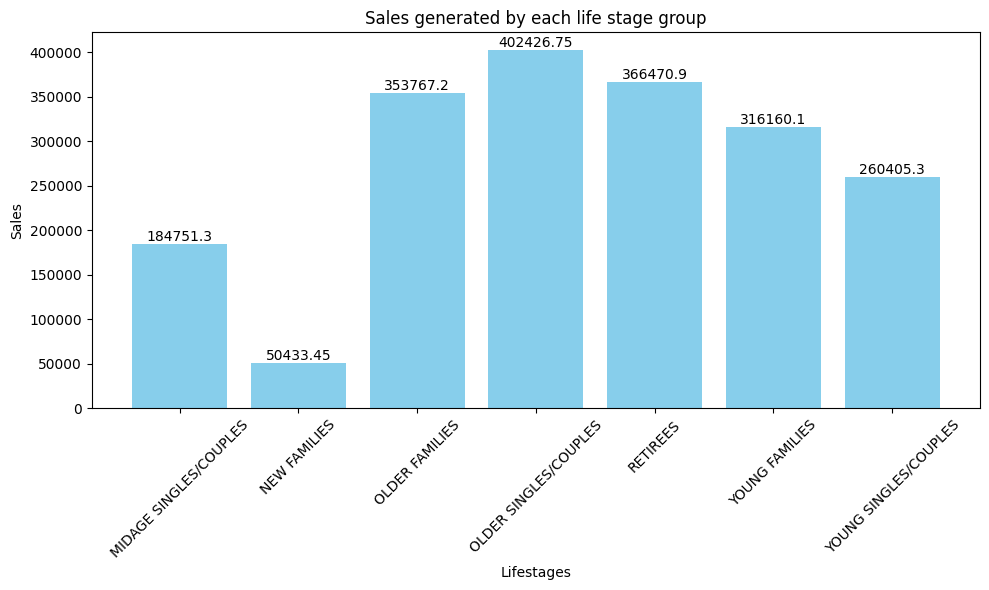

In [429]:
plot_bar(lifestage_sales_data['LIFESTAGE'], lifestage_sales_data['TOT_SALES'], 'Lifestages', 'Sales',
         'Sales generated by each life stage group')

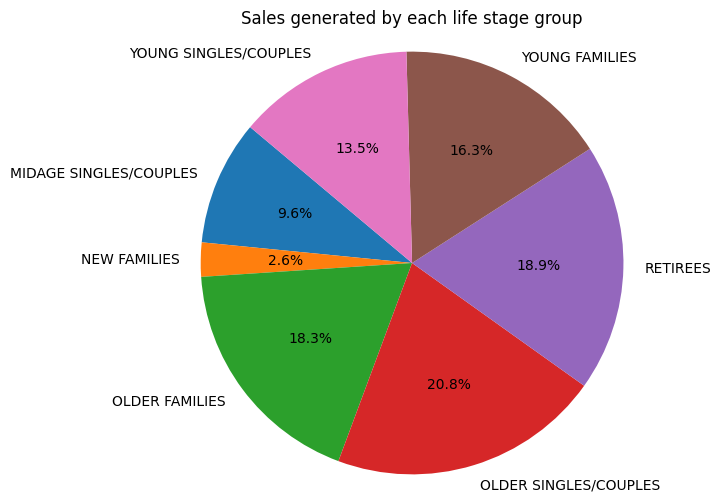

In [430]:
plot_pie(lifestage_sales_data['TOT_SALES'], lifestage_sales_data['LIFESTAGE'],
         'Sales generated by each life stage group')

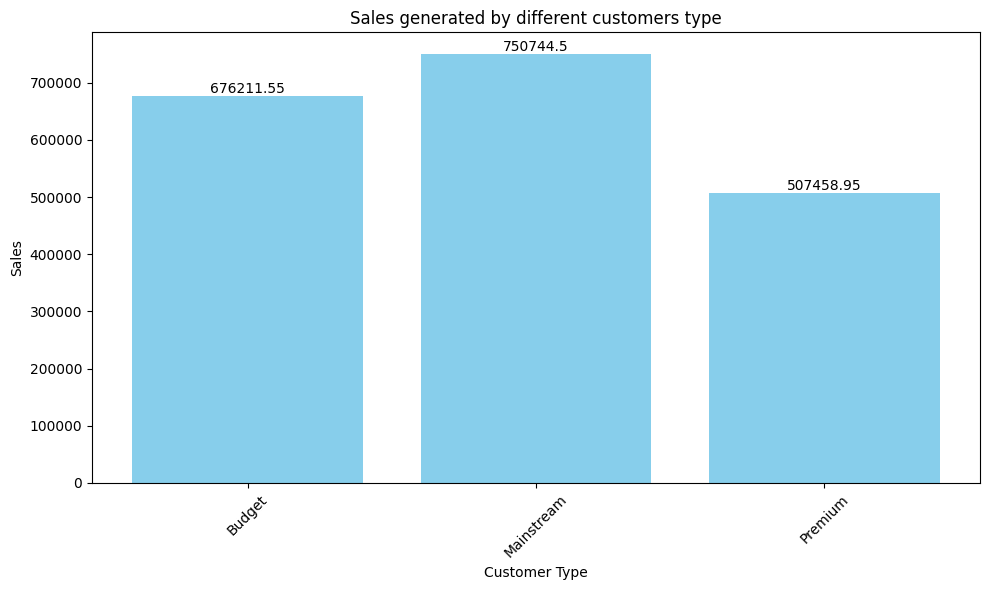

In [431]:
plot_bar(premium_customer_sales_data['PREMIUM_CUSTOMER'], premium_customer_sales_data['TOT_SALES'],
         'Customer Type', 'Sales', 'Sales generated by different customers type')

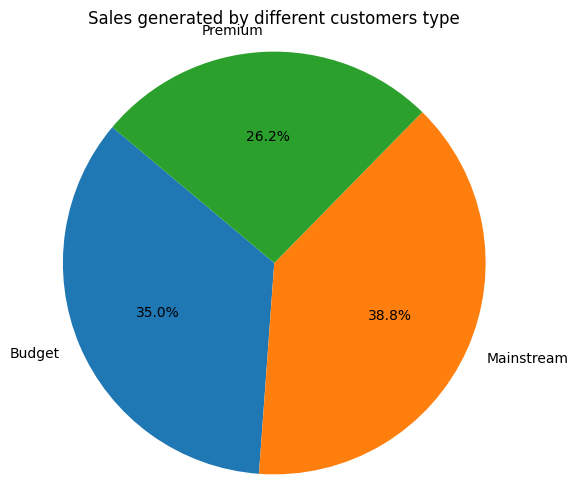

In [432]:
plot_pie(premium_customer_sales_data['TOT_SALES'], premium_customer_sales_data['PREMIUM_CUSTOMER'],
         'Sales generated by different customers type')

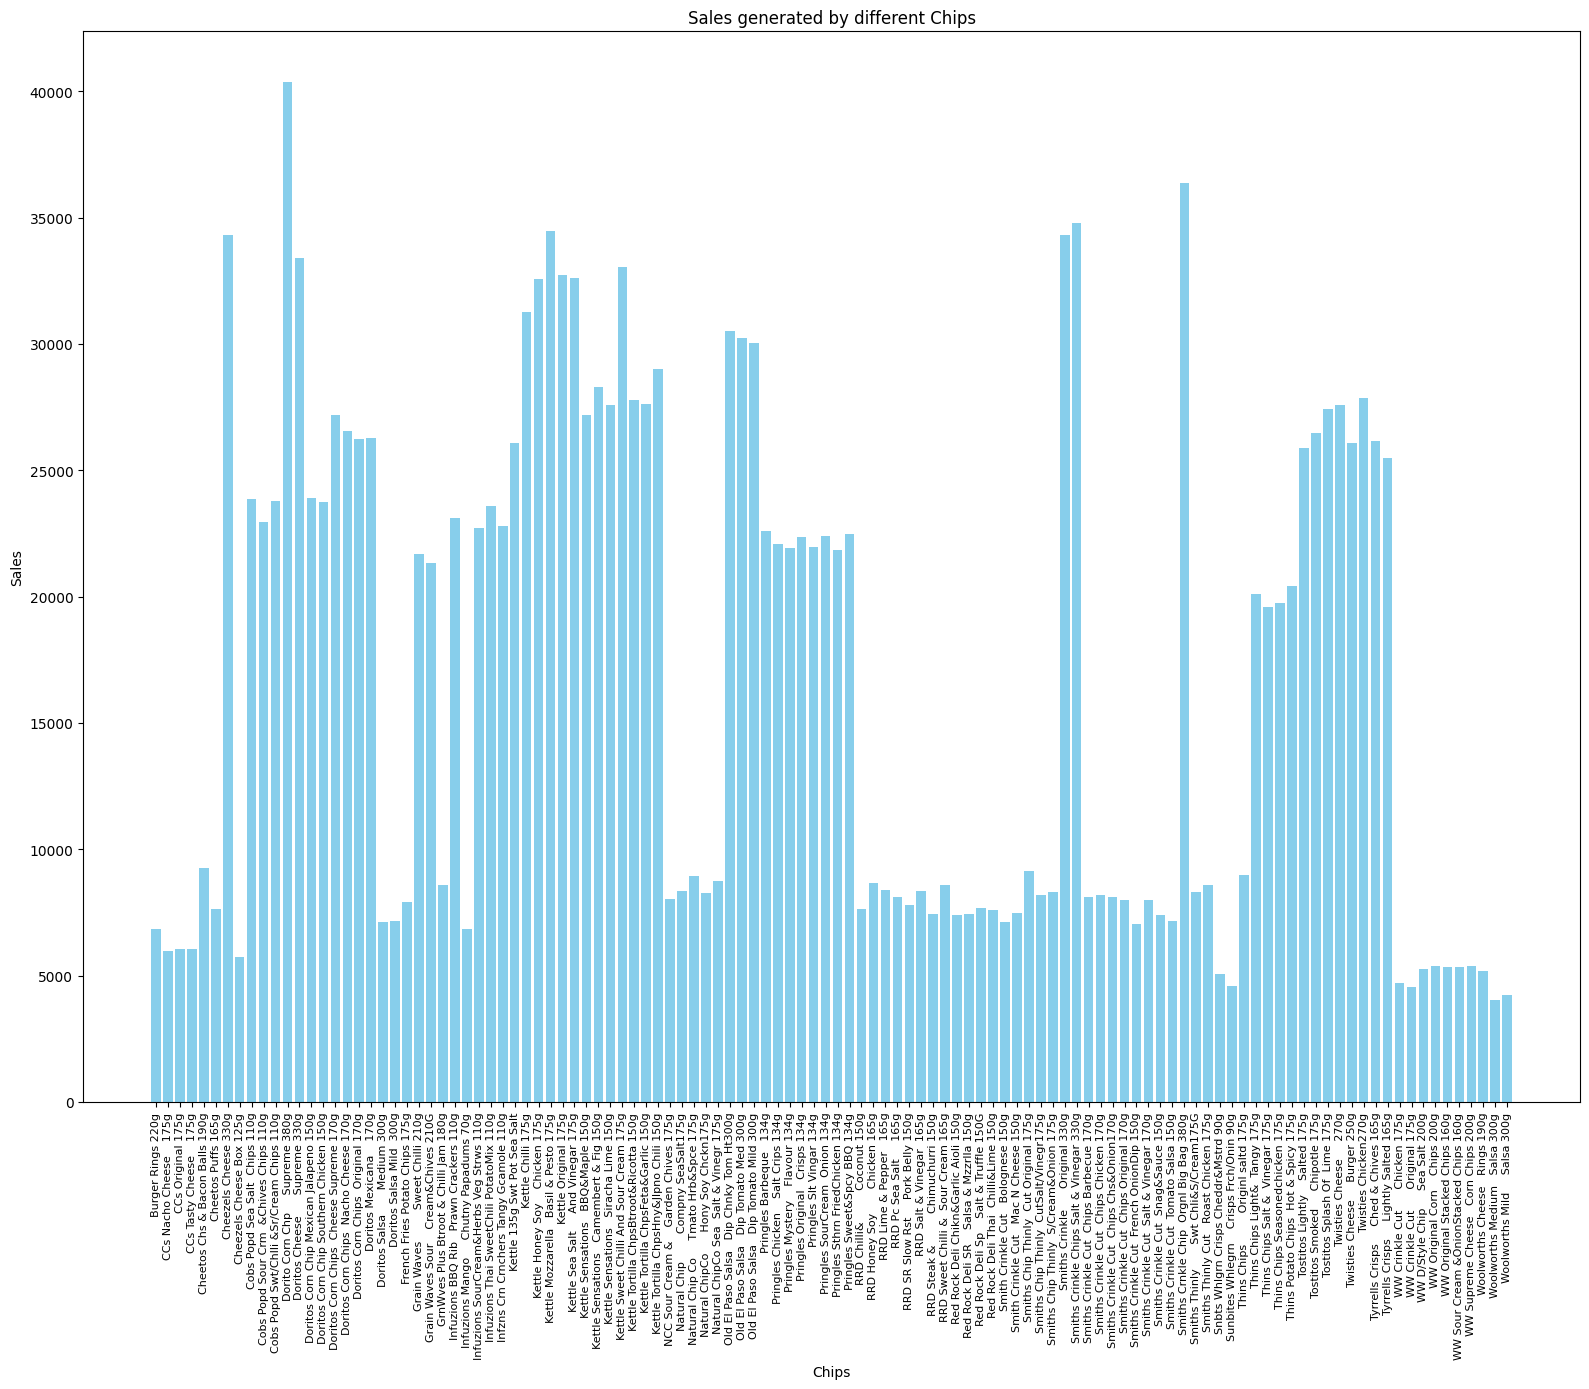

In [433]:
plot_bar(chips_sales_data['PROD_NAME'], chips_sales_data['TOT_SALES'], 'Chips', 'Sales',
         'Sales generated by different Chips')

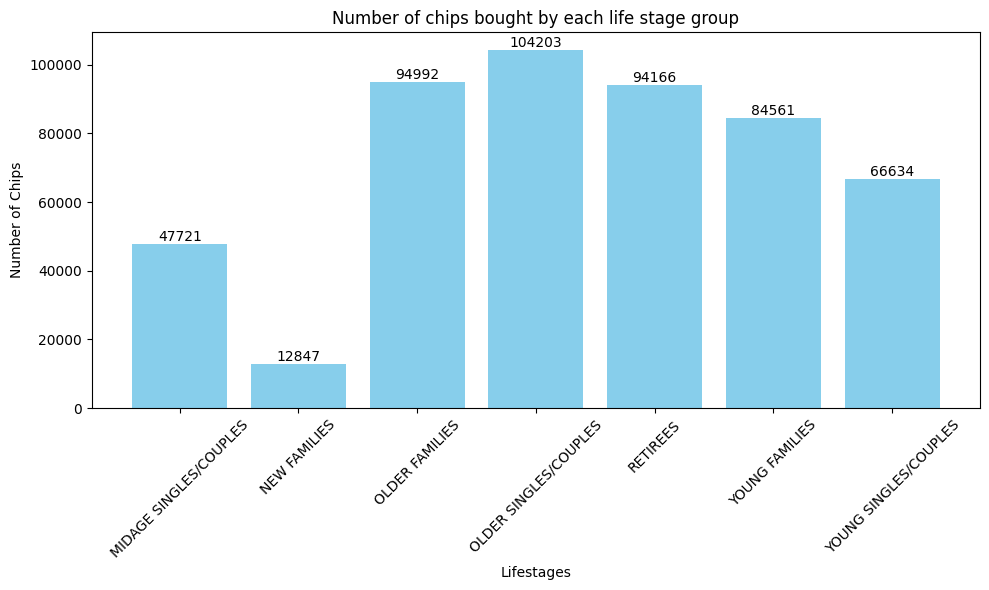

In [434]:
plot_bar(lifestage_qty_data['LIFESTAGE'], lifestage_qty_data['PROD_QTY'],
         'Lifestages', 'Number of Chips', 'Number of chips bought by each life stage group')

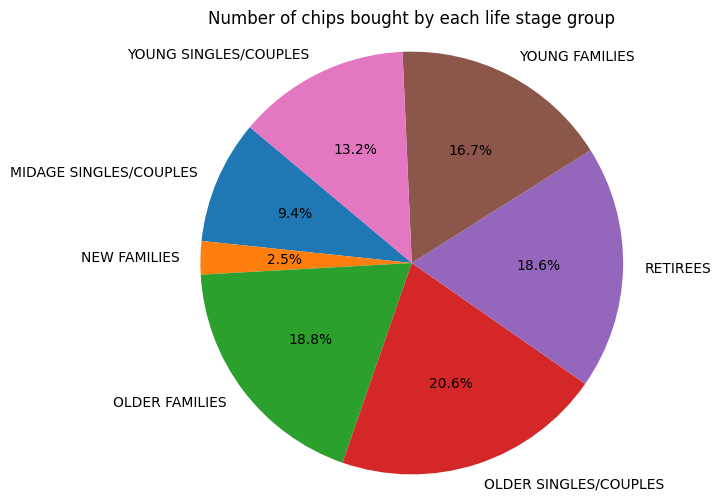

In [435]:
plot_pie(lifestage_qty_data['PROD_QTY'], lifestage_qty_data['LIFESTAGE'],
         'Number of chips bought by each life stage group')

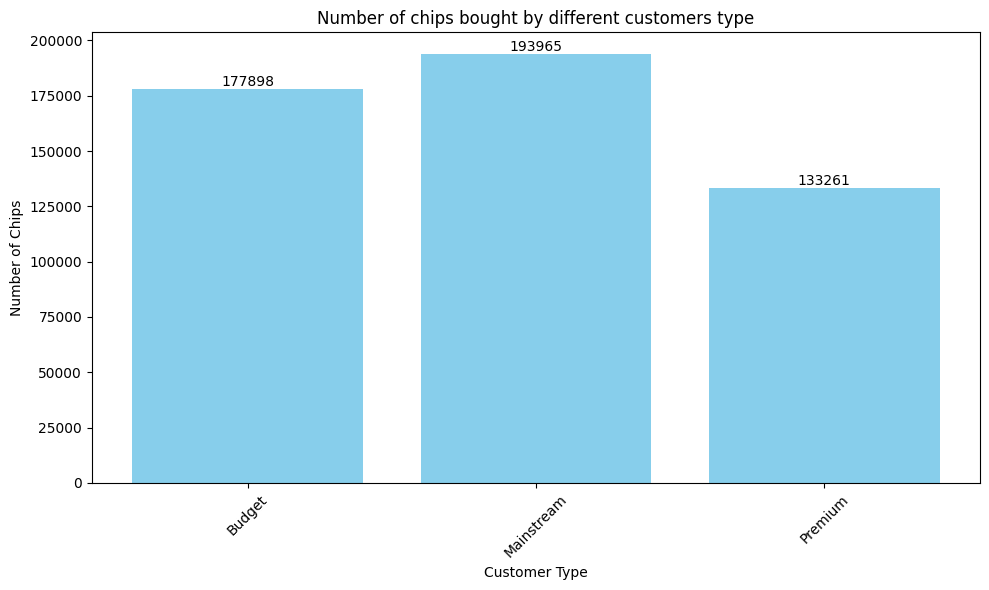

In [436]:
plot_bar(premium_customer_qty_data['PREMIUM_CUSTOMER'], premium_customer_qty_data['PROD_QTY'],
         'Customer Type', 'Number of Chips', 'Number of chips bought by different customers type')

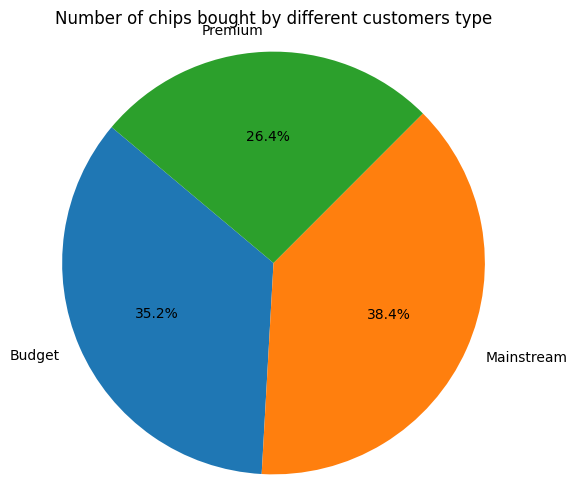

In [437]:
plot_pie(premium_customer_qty_data['PROD_QTY'], premium_customer_qty_data['PREMIUM_CUSTOMER'],
         'Number of chips bought by different customers type')

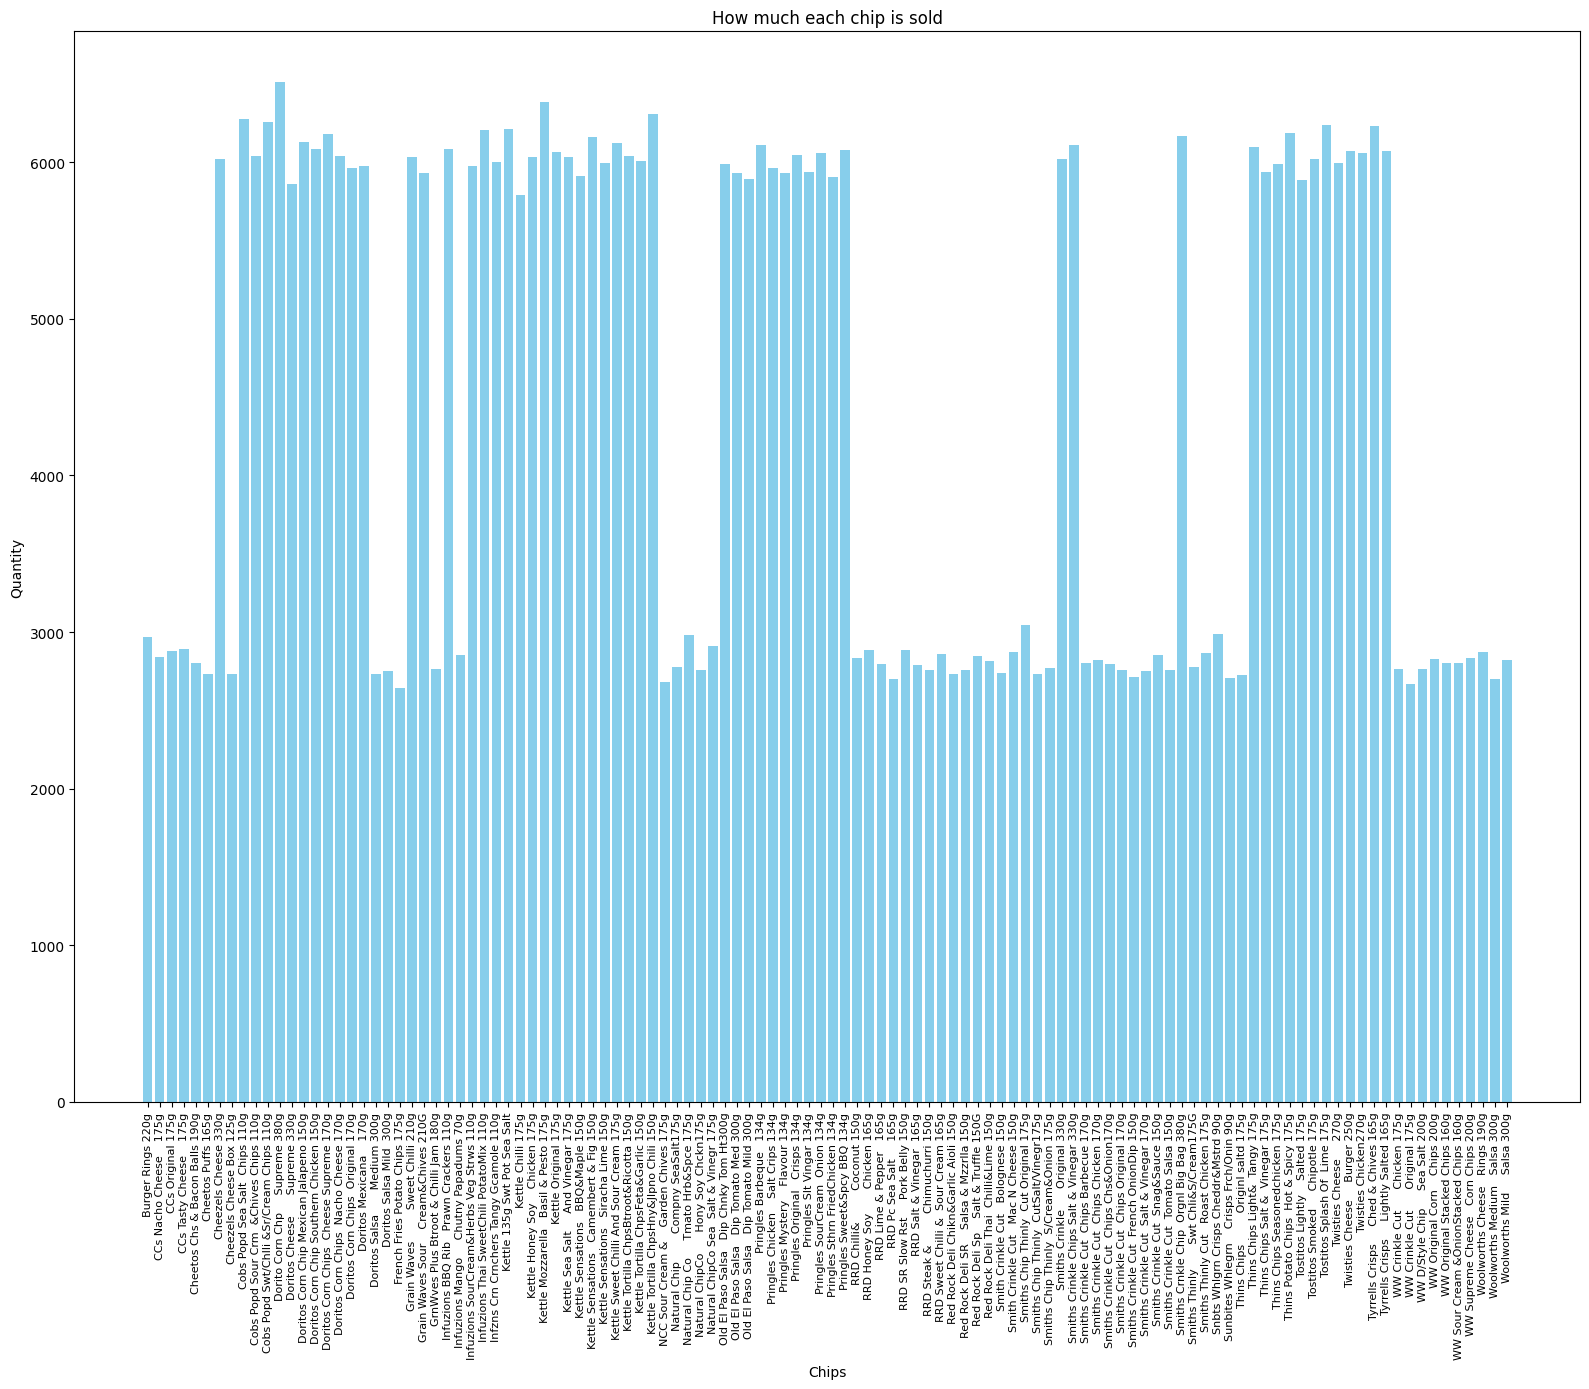

In [438]:
plot_bar(chips_qty_data['PROD_NAME'], chips_qty_data['PROD_QTY'], 'Chips',
         'Quantity', 'How much each chip is sold')

In [439]:
len(purchase_info_df['DATE'].unique())

364

In [440]:
dates = sorted(purchase_info_df['DATE'].unique())
print(dates[0])
print(dates[-1])

43282
43646


In [441]:
date_wise_sales_data = purchase_info_df.groupby('DATE')['TOT_SALES'].sum().reset_index()
date_wise_qty_data = purchase_info_df.groupby('DATE')['PROD_QTY'].sum().reset_index()

In [442]:
days = []
for i in range(1, 365):
  days.append(i)
date_wise_sales_data['day'] = days
date_wise_qty_data['day'] = days

In [443]:
def plt_line_plot(x, y, x_name, y_name, title):
  plt.figure(figsize=(16,14))
  plt.plot(x, y, color = "red", linestyle = "-")
  plt.xlabel(x_name)
  plt.ylabel(y_name)
  plt.title(title)

  plt.show()

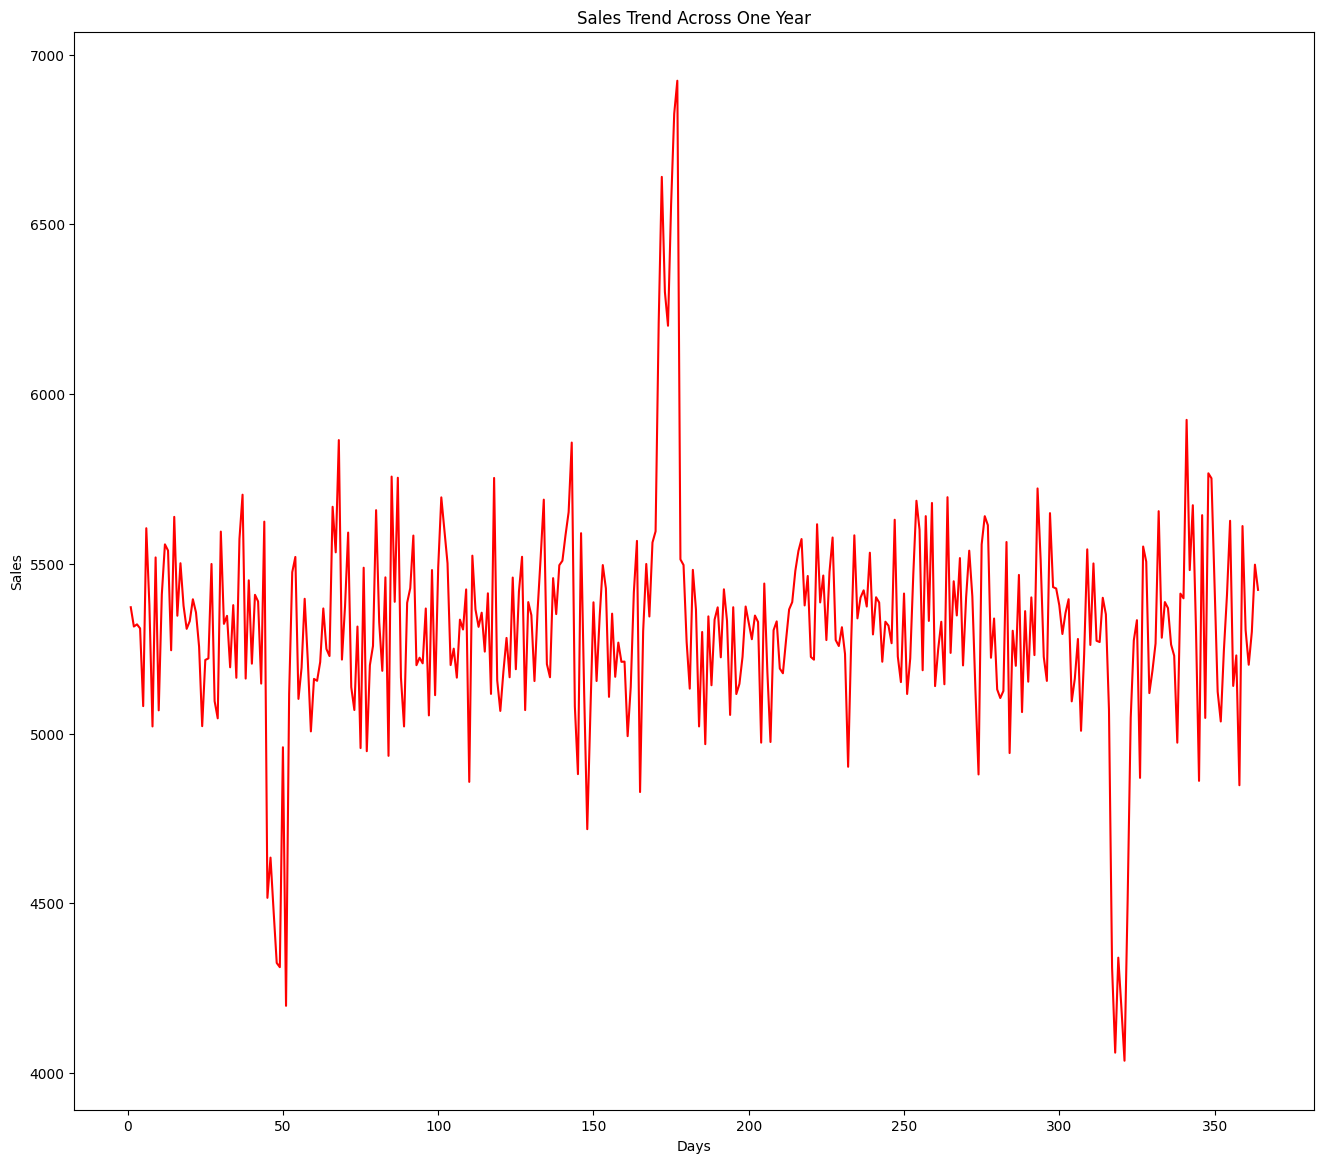

In [444]:
plt_line_plot(date_wise_sales_data['day'], date_wise_sales_data['TOT_SALES'], 'Days',
              'Sales', 'Sales Trend Across One Year')

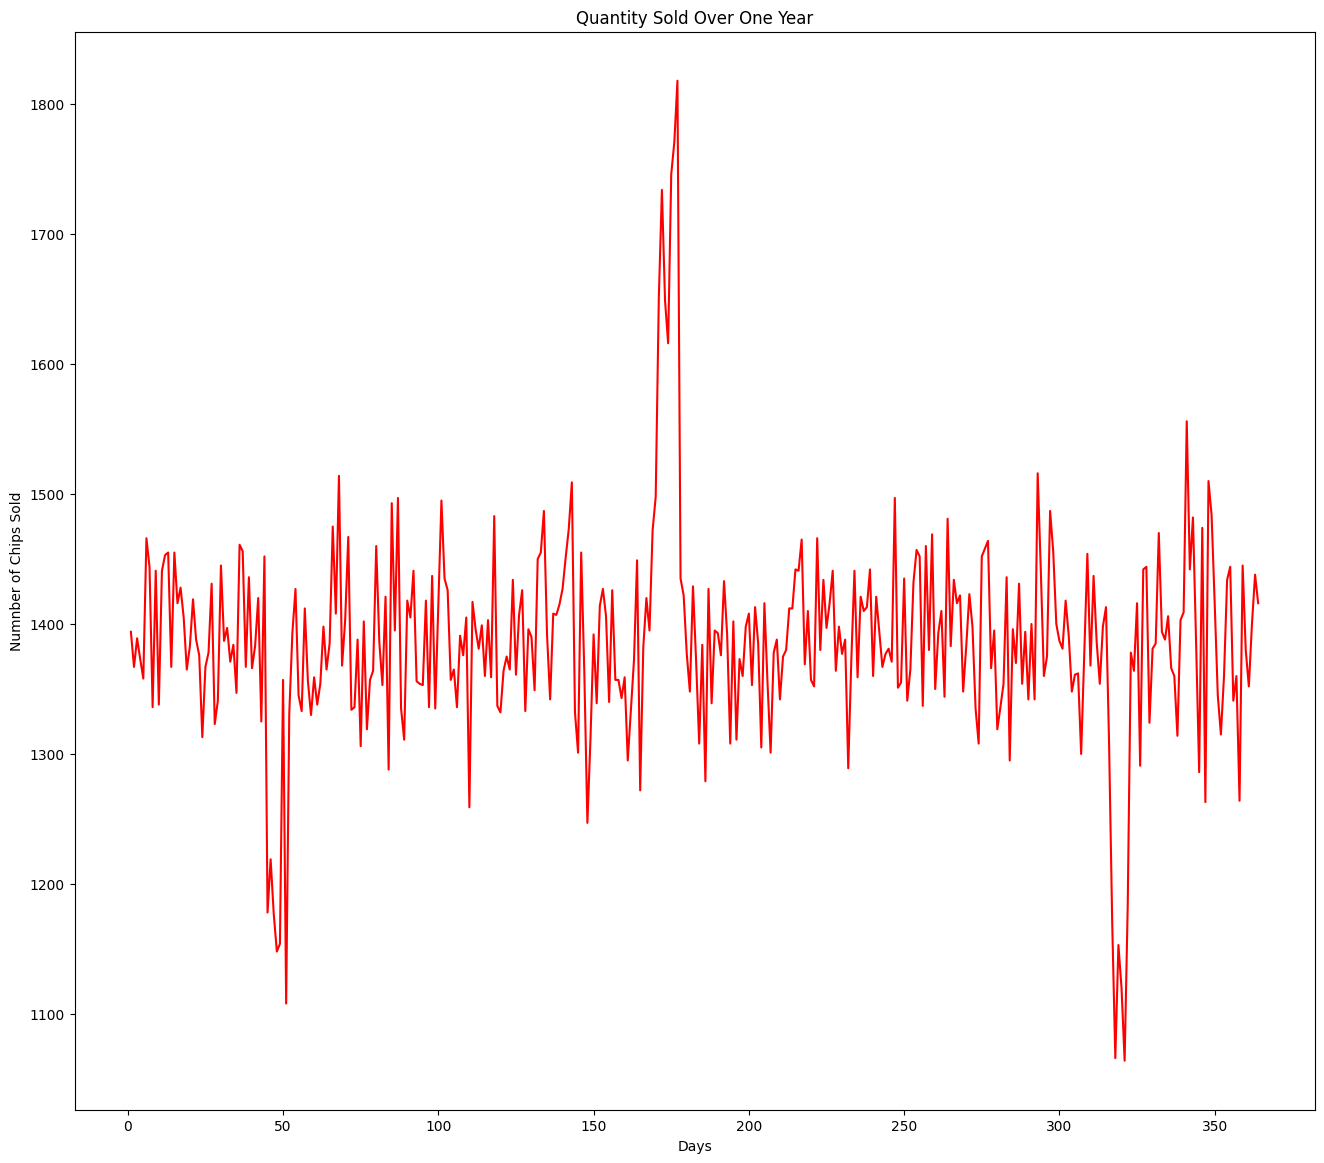

In [445]:
plt_line_plot(date_wise_qty_data['day'], date_wise_qty_data['PROD_QTY'], 'Days',
              'Number of Chips Sold', 'Quantity Sold Over One Year')